In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.datasets import cifar10
import cv2
from tqdm import tqdm
from tensorflow.keras.layers import Activation,Dense,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

2023-04-23 19:02:43.334601: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 19:02:43.389091: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-23 19:02:43.389983: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-23 19:02:44.262437: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


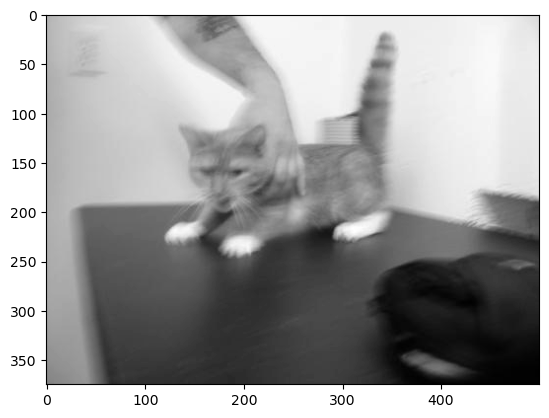

In [2]:
DATADIR = "/media/sahil/study (f:)/kaggledataset/PetImages"
CATEGORIES = ["Cat", "Dog"]
for categories in CATEGORIES:
    path = os.path.join(DATADIR, categories)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break
       
       

        

In [3]:
print(img_array)

[[167 167 168 ... 204 203 202]
 [167 167 168 ... 204 203 203]
 [167 167 168 ... 205 204 203]
 ...
 [124 124 124 ...   2   2   2]
 [123 123 123 ...   1   1   1]
 [122 122 123 ...   1   1   1]]


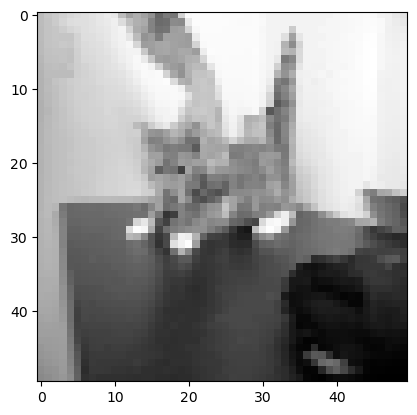

In [4]:
img_size=50
img_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(img_array,cmap="gray")
plt.show()

In [5]:
training_data=[]
def creating_train_data():
    for categories in CATEGORIES:
        path=os.path.join(DATADIR,categories)
        class_num=CATEGORIES.index(categories)
        #print(class_num)
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array=cv2.resize(img_array, (img_size, img_size))
               # new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                    pass

creating_train_data()
print(len(training_data))

    

100%|████████████████████████████████████| 12501/12501 [00:40<00:00, 311.34it/s]

24946


In [6]:
import random
random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
1
0
0
1
1
0
1


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [9]:

print(X[0].reshape(-1, img_size,img_size, 1))

X = np.array(X).reshape(-1,img_size,img_size, 1)

[[[[143]
   [147]
   [145]
   ...
   [148]
   [148]
   [146]]

  [[147]
   [145]
   [145]
   ...
   [150]
   [147]
   [146]]

  [[150]
   [145]
   [150]
   ...
   [146]
   [148]
   [139]]

  ...

  [[188]
   [178]
   [186]
   ...
   [187]
   [189]
   [186]]

  [[178]
   [185]
   [184]
   ...
   [188]
   [177]
   [188]]

  [[188]
   [194]
   [192]
   ...
   [186]
   [190]
   [190]]]]


In [10]:
import pickle

In [11]:

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

In [12]:
pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [14]:
import pickle

In [15]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [16]:
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [17]:
X=X/255.0
print(X.shape)
#print(y.shape)

(24946, 50, 50, 1)


In [18]:
print(X)

[[[[0.56078431]
   [0.57647059]
   [0.56862745]
   ...
   [0.58039216]
   [0.58039216]
   [0.57254902]]

  [[0.57647059]
   [0.56862745]
   [0.56862745]
   ...
   [0.58823529]
   [0.57647059]
   [0.57254902]]

  [[0.58823529]
   [0.56862745]
   [0.58823529]
   ...
   [0.57254902]
   [0.58039216]
   [0.54509804]]

  ...

  [[0.7372549 ]
   [0.69803922]
   [0.72941176]
   ...
   [0.73333333]
   [0.74117647]
   [0.72941176]]

  [[0.69803922]
   [0.7254902 ]
   [0.72156863]
   ...
   [0.7372549 ]
   [0.69411765]
   [0.7372549 ]]

  [[0.7372549 ]
   [0.76078431]
   [0.75294118]
   ...
   [0.72941176]
   [0.74509804]
   [0.74509804]]]


 [[[0.83529412]
   [0.70196078]
   [0.0627451 ]
   ...
   [0.24705882]
   [0.34901961]
   [0.85490196]]

  [[0.81960784]
   [0.07058824]
   [0.04705882]
   ...
   [0.44705882]
   [0.36862745]
   [0.84705882]]

  [[0.06666667]
   [0.05098039]
   [0.15686275]
   ...
   [0.44313725]
   [0.34901961]
   [0.77647059]]

  ...

  [[0.63137255]
   [0.64705882]
   [0.6

In [19]:

from tensorflow.keras.callbacks import TensorBoard


In [20]:


#NAME="Cats-vs-dogs-CNN"
#tensorboard=TensorBoard(log_dir="logs/{}".format(NAME))

In [21]:
#model = Sequential()

#model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Conv2D(256, (3, 3)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.output_shape
#model.add(Flatten())  #3D to 1D

#model.add(Dense(64))

#model.add(Dense(1))
#model.add(Activation('sigmoid'))

#model.compile(loss='binary_crossentropy',
              #optimizer='adam',
              #metrics=['accuracy'])

#y = np.array(y)
#model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3,callbacks=[tensorboard])

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )
            y=np.array(y)
            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])
model.save('64x3-CNN.model')

3-conv-64-nodes-0-dense-1682256861


2023-04-23 19:04:24.406037: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 174620000 exceeds 10% of free system memory.


Epoch 1/10


2023-04-23 19:04:28.316878: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18874368 exceeds 10% of free system memory.
2023-04-23 19:04:28.992428: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16609536 exceeds 10% of free system memory.
2023-04-23 19:04:29.006072: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 16609536 exceeds 10% of free system memory.
2023-04-23 19:04:29.089709: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25648128 exceeds 10% of free system memory.


546/546 [==============================] - 75s 132ms/step - loss: 0.6514 - accuracy: 0.6133 - val_loss: 0.5810 - val_accuracy: 0.6978
Epoch 2/10
546/546 [==============================] - 73s 133ms/step - loss: 0.5504 - accuracy: 0.7198 - val_loss: 0.5176 - val_accuracy: 0.7465
Epoch 3/10
546/546 [==============================] - 81s 149ms/step - loss: 0.4963 - accuracy: 0.7644 - val_loss: 0.4742 - val_accuracy: 0.7711
Epoch 4/10
546/546 [==============================] - 77s 140ms/step - loss: 0.4593 - accuracy: 0.7861 - val_loss: 0.4627 - val_accuracy: 0.7794
Epoch 5/10
546/546 [==============================] - 67s 123ms/step - loss: 0.4277 - accuracy: 0.8044 - val_loss: 0.4670 - val_accuracy: 0.7750
Epoch 6/10
546/546 [==============================] - 68s 125ms/step - loss: 0.4040 - accuracy: 0.8158 - val_loss: 0.4318 - val_accuracy: 0.7980
Epoch 7/10
546/546 [==============================] - 67s 122ms/step - loss: 0.3755 - accuracy: 0.8304 - val_loss: 0.4275 - val_accuracy: 0.7

INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


INFO:tensorflow:Assets written to: 64x3-CNN.model/assets


In [22]:
print(y)

[1 0 1 ... 1 1 0]


In [46]:
def prepare(filepath):
    img_size=50
    img_array=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array=cv2.resize(img_array,(img_size,img_size))
    return new_array.reshape(-1, img_size, img_size, 1) 

In [48]:
model = tf.keras.models.load_model("/media/sahil/study (f:)/kaggledataset/64x3-CNN.model")
prediction = model.predict([prepare('/media/sahil/study (f:)/kaggledataset/PetImages/dog.jpg')])

1/1 [==============================] - 1s 682ms/step


In [50]:
prediction

array([[1.]], dtype=float32)

In [51]:
prediction[0][0]

1.0

In [52]:
print(CATEGORIES[int(prediction[0][0])])

Dog
